# CHE 341 A6: Sympy for Symbolic Math

This notebook introduces SymPy, the Python package for symbolic mathematics. This is another potentially useful tool for automating and/or checking your algebra, calculus, and other mathematics. First, let's import everything and set up a nice solve function:

In [1]:
import sympy as sm
sm.init_printing() # Makes the math look pretty!
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
from sympy.abc import *

def solve(equation, variable, subs=None, unwrap=True):
    """Solve equation for the given variable; if given, a dictionary of subs
    (substitutions) can be given. This is useful if you want to solve numerically
    rather than symbolically. 
    
    Parameters:
    equation : the sympy equation to solve
    variable : the sympy variable to solve for
    subs : the dictionary of substitutions
    unwrap : if there is only one solution, return it directly rather than returning a list.
    
    Returns:
    The solution (if one solution and unwrap=True), or a list of all possible solutions.
    
    Examples: 
    >>> solve(a*x**2 + b*x + c, x)
        [(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]
        
    """
    if subs is not None:
        subs = copy(subs)
        subs.pop(variable.name, None)
        out = sm.solve(equation.subs(subs), variable)
    else:
        out = sm.solve(equation, variable)
    if unwrap and len(out) == 1:
        out = out[0]
    return out

All capital and lowercase single letter variables (`a, b, c, A, B, C`) and Greek letters (`alpha, beta, gamma`) are defined as Sympy variables by default because of the line `from sympy.abc import *`.

## Symbolic Math: Solving Equations

For example, below we solve the quadratic equation for $x$:

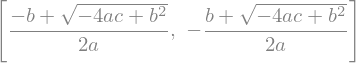

In [2]:
solns = solve(a*x**2 + b*x+c, x) # Just like your calculator, the expression is assumed equal to zero
solns

Here's an example where we solve for a numerical value, substituting in different values into the ideal gas law:

In [3]:
# This is like your calculator solver, but using Python - you can easily solve more complicated equations
# subs is a dictionary of substitutions - variables and their values...
subs=dict(
P = 1.0, # atm
R = 0.08206, # L atm/mol-K
T = 273, # K
n = 1, # mol
V=22.4 # L
)
gas_law = P*V-n*R*T # Set equal to zero in order to solve
solve(gas_law, V, subs) # volume (in L) of 1 mol of an ideal gas at 273 K, 1 atm ("STP")

**1. Try it.** What is the pressure of 1 mol of an ideal gas confined to a volume of 1 L at 30 °C? (change the numbers above and write your answer and/or copy the cell...

We can also solve symbolically:

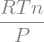

In [4]:
solve(gas_law, V)

Which says that $V = n R T / P$ for an ideal gas.

## Integrals

To integrate, use the function `sm.integrate`. For example,

$$\int x^2 \, d x = x^3/3 + C$$

where $C$ is the constant of integration. In SymPy, we put the integrand first, then the variable we are integrating with respect to second.

In [5]:
sm.integrate(x**2, x)

Sympy doesn't include the constant of integration. You can also do definite integrals, like

$$\int_0^2 x^2 \, d x = \left . \frac{x^3}{3} \right |_{0}^{2} = \frac{2^3}{3} - \frac{0^3}{3} = \frac{8}{3}$$


We do this by adding additional items to the second argument:

In [6]:
#sm.integrate(integrand, (variable, lower_bound, upper_bound))
sm.integrate(x**2, (x, 0, 2))

**1. Try it:** Do the definite integral $$\int_{V_i}^{V_f} \frac{n R T}{V} \, dV .$$

In [7]:
# This defines the symbols V_i and V_f for the initial and final volumes 
V_i, V_f = sm.symbols('V_i V_f', positive=True) 

# Do the integral here (replace None with the integral)
integral_1 = None
integral_1 # Print the answer...

To make an answer simpler, try the `sm.simplify` function:

In [8]:
# Uncomment the line below once you do your integral
# sm.simplify(integral_1)

### Derivatives

Derivatives. The two key rules to remember are

$$\frac{d}{dx} \, x^n = n x^{n-1} $$

and

$$\frac{d}{dx} \, \ln{x} = \frac{1}{x}.$$


Use the function `sm.diff` to take derivatives. For example, we can undo the integral we did above, taking $$ \frac{d}{dx} \frac{x^3}{3} = x^2 $$

In [9]:
#sm.diff(expression_to_differentiate, variable)
sm.diff(x**3/3, x)

**3. Try it: Take the derivative $\frac{d}{dx} 18\pi + 3x - 4x^2 + 3\ln{x}$ using Python.** Check your answer by applying the rules above.

Remember to use `sm.ln` for $\ln$, `sm.pi` for $\pi$, and so on. Remember that you need to include `*` to mean multiplication, `**` for exponents.

Note: `sm.ln` will appear as $\log$ - the math convention where log means natural logarithm.

**4. Try it:**  The compressibility of a substance is
$$\newcommand{\pdc}[3]{\left( \frac{\partial #1}{\partial #2}
 \right)_{#3}}$$

$$        \beta_T = -\frac{1}{V} \pdc{V}{P}{T} $$
        Evaluate the compressibility of an ideal gas by calculating
$$\beta_T = -\frac{1}{V} \left (\frac{d}{dP} \, \frac{n R T}{P} \right )$$

You can do the derivative part in parentheses, then multiply by $1/V$.